# DATASCI Final Project Title

Group: Baby Alive!

Members:
    Benedictos,
    Loquinte,
    Marasigan,
    Masilang,
    Tejada

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Musixmatch API Library

- describe API Library

### Azapi

Azapi is an API by Khaled ElMorshedy (https://github.com/elmoiv) for AZLyrics.com to get the lyrics of a song. This will be used by the researchers to collect the complete lyrics of the songs the researchers got from the Musixmatch API. Azapi can be accessed through the link https://github.com/elmoiv/azapi

In [2]:
#code here

### Research Objectives

In [3]:
#code here

### Scopes and Limitations

In [4]:
#code here

---

## Data Preparation

In [5]:
# code here

### Get sets of genres (Musix) 

In [6]:
# code here

### Get list of Filipino songs filtered by genres 
Year: 2011-2020

In [7]:
# code here

### Generate `.csv` files
(1 malaking DataFrame -> 1 DataFrame = 1 genre

In [8]:
# code here

### Get lyrics of each song via lyrics_id

In [9]:
# code here

### Load files

The files to be used for this study are the following:
- `all_music.csv`
- `alternative_music.csv`
- `christian_music.csv`
- `hiphop_music.csv`
- `pop_music.csv`
- `rbSoul_music.csv`
- `rock_music.csv`

In [2]:
df = pd.read_csv('CSV Files/all_music.csv')
df_alt = pd.read_csv('CSV Files/alternative_music.csv')
df_chr = pd.read_csv('CSV Files/christian_music.csv')
df_hphp = pd.read_csv('CSV Files/hiphop_music.csv')
df_pop = pd.read_csv('CSV Files/pop_music.csv')
df_rb = pd.read_csv('CSV Files/rbSoul_music.csv')
df_rck = pd.read_csv('CSV Files/rock_music.csv')

---

## Initial Exploratory Data Analysis

In [3]:
df

,Unnamed: 0,track_id,track_name,artist_name,genre_id,genre_names,lyrics
0,0,163709256,Ikaw At Ako,Moira Dela Torre feat. Jason Marvin,['14'],['Pop'],Sabi nila\r\nBalang araw darating\r\nAng iyong...
1,1,167116583,Hanggang Dito Na Lang,Jaya,['14'],['Pop'],Di ko alam kung tama ba ito.\r\nLilisan ako up...
2,2,114473971,Ikaw,Yeng Constantino,['14'],['Pop'],Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...
3,3,114797567,Chinito,Yeng Constantino,['14'],['Pop'],Mapapansin mo ba\r\nKaya ang tulad ko\r\nKahit...
4,4,160018049,Dati (Cover Version),Ben&Ben,['14'],['Pop'],Datirati sabay pa nating pinangarap ang lahat\...
...,...,...,...,...,...,...,...
1727,1727,83929781,Gagawa Ang Diyos (God Will Make a Way),Lito Magnaye,['22'],['Christian & Gospel'],NaN
1728,1728,79505181,Ang Panginoon Ay Awitan,Tony Rodeo,['22'],['Christian & Gospel'],NaN
1729,1729,136863016,Ikaw Lamang (Live),Rommel Guevara,['22'],['Christian & Gospel'],NaN
1730,1730,78391977,Mga Pangako Mo (Live),Jesus One Generation,['22'],['Christian & Gospel'],NaN


### Number of songs per genre

First we look into the composition of the dataset in terms of genres. For this part, we are not counting multiple genres of a song as individual labels. Therefore, if one song's genre is both _Alternative_ and _Pop_, it will fall under the label _Alternative, Pop_.

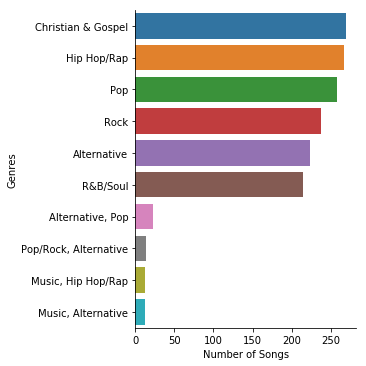

In [4]:
primary_genres = df["genre_names"].value_counts().rename_axis('Genres').reset_index(name='Number of Songs')
primary_genres = primary_genres.nlargest(10, 'Number of Songs')
primary_genres["Genres"] = primary_genres["Genres"].str.replace('[\[\]\']', '', regex=True) #remove brackets and quotes 

primary_genres_plot = sns.catplot(y="Genres", x="Number of Songs", kind="bar", data=primary_genres)

#### OBSERVATION HERE

Next, we consider each genre in a multiple-genred song as their own individual labels. Therefore -- using the example a while ago -- if a song's genre is both _Alternative_ and _Pop_, it will now fall under both the _Alternative_ label and the _Pop_ label.

To be able to count the frequency of each individual genre, the `genre_names` column must be converted into a matrix table where each row contains all genres of a single song, and each column contains a single genre of that song (e.g. if a song has two genres, then each will have their corresponding columns).

To split the genres, we use the fact that the multiple genres are separated by commas. We also remove unnecessary characters like brackets and apostrophes. 

In [6]:
genres_series = df['genre_names'].replace("[\[\]\']", '', regex=True)
genres_matrix = []

for string in genres_series:
    split_str = string.split(', ')
    genres_matrix.append(split_str)

genres_df = pd.DataFrame(genres_matrix)
genres_df

,0,1,2,3
0,Pop,None,None,None
1,Pop,None,None,None
2,Pop,None,None,None
3,Pop,None,None,None
4,Pop,None,None,None
...,...,...,...,...
1727,Christian & Gospel,None,None,None
1728,Christian & Gospel,None,None,None
1729,Christian & Gospel,None,None,None
1730,Christian & Gospel,None,None,None


We see that the resulting table has 4 columns which means that there are, at most, 4 genres in a single song. To check which songs these are, we can just check whether it has a value at the 4th column. 

In [7]:
genres_df[~genres_df.iloc[:, 3].isnull()]

,0,1,2,3
37,Jazz,Pop,World,Asia
712,Rap,Hip-Hop,Pop,Hip Hop/Rap


In [8]:
df.iloc[[38,573]]

,Unnamed: 0,track_id,track_name,artist_name,genre_id,genre_names,lyrics
38,38,114754166,Sariling Awit Natin,Lea Salonga feat. Bamboo & Sarah Geronimo,['14'],['Pop'],NaN
573,573,128961508,Knock Ng Talk Hang (Int3rlude),Shanti Dope,['18'],['Hip Hop/Rap'],NaN


### Observations here

Next, we just concatenate all of these values into a single list and use this to get the count of each individual genres in the dataset.

In [11]:
genres_list = pd.concat([genres_df[0], genres_df[1], genres_df[2]])
genres_list.dropna(inplace = True)
genres_list

0         Pop
1         Pop
2         Pop
3         Pop
4         Pop
        ...  
1200    Music
1256     Rock
1261     Rock
1286    Music
1358    Music
Length: 2018, dtype: object

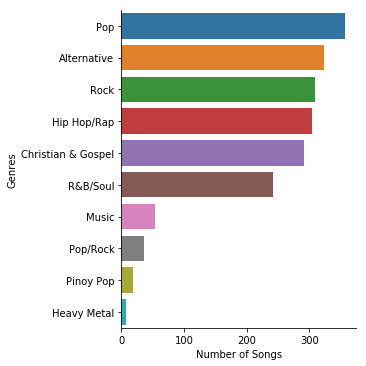

In [12]:
unique_genres = genres_list.value_counts().rename_axis('Genres').reset_index(name='Number of Songs')

unique_genres = unique_genres.nlargest(10, 'Number of Songs')
unique_genres_plot = sns.catplot(y="Genres", x="Number of Songs", kind="bar", data=unique_genres)

### Observations here

### Word Counts (Top N words)

Next, we count the frequency of each word in the corpus of lyrics that we have. For convenience, we utilize scikit-learn's CountVectorizer_.

In [ ]:
# vectorizer = CountVectorizer()
# vocabulary = vectorizer.fit_transform([df_temp.iloc[0,6]])
# print(vectorizer.get_feature_names())

In [ ]:
# df_temp = df.dropna(subset=['lyrics'])
# print(df_temp[df_temp['lyrics'].str.contains("\\b002737\\b", regex=True)].iloc[0,6])
# # print(df_temp.iloc[0, 6])
# # df_temp

In [13]:
corpus = df["lyrics"].dropna()
# df.loc[df["lyrics"].notnull(), ["lyrics"]]

words = "Hello Philippines hello world"

print(corpus)

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(corpus)
# tokenizer = vectorizer.build_tokenizer()
# tokenized = tokenizer(words)
# len(tokenized)

0       Sabi nila\r\nBalang araw darating\r\nAng iyong...
1       Di ko alam kung tama ba ito.\r\nLilisan ako up...
2       Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...
3       Mapapansin mo ba\r\nKaya ang tulad ko\r\nKahit...
4       Datirati sabay pa nating pinangarap ang lahat\...
                              ...                        
1489    Eh Yahwhe\r\nEh Yahwhe na nga yo kumama\r\nEh ...
1584    Kilala Mo, mga bituin\r\nMga likha sa daigdig\...
1612    Sa piling niya'y ligaya\r\nPuno ng pagpapala\r...
1647    Sa piling Niya'y ligaya\r\nPuno ng pagpapala\r...
1691    Sa 'Yong biyaya, ako ay namamangha\r\nSa 'Yong...
Name: lyrics, Length: 574, dtype: object


In [14]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
counts

,10,1861,1896,19,1st,2020,2nd,2x,30,3rd,...,yuh,yumabang,yumakap,yumayakap,yun,yung,yuri,zacariah,zembo,zoren
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


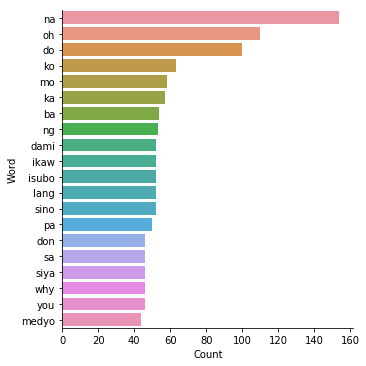

In [15]:
word_count = counts.max().nlargest(20).reset_index(name = "Count").rename(columns={'index': 'Word'})

word_count_plot = sns.catplot(y="Word", x="Count", orient="h", kind="bar", data=word_count)

maybe also show results without english stop words...

### Average Length of Song Lyrics

In [16]:
def count_words(text):

    vectorizer = CountVectorizer()
    matrix = vectorizer.fit_transform(text)
    
    return matrix.sum()

In [17]:
df_lyrics = df[["artist_name", "genre_names", "lyrics"]].dropna()

df_lyrics["count"] = df_lyrics["lyrics"].apply(lambda x: count_words([x]))
df_lyrics

,artist_name,genre_names,lyrics,count
0,Moira Dela Torre feat. Jason Marvin,['Pop'],Sabi nila\r\nBalang araw darating\r\nAng iyong...,157
1,Jaya,['Pop'],Di ko alam kung tama ba ito.\r\nLilisan ako up...,160
2,Yeng Constantino,['Pop'],Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...,224
3,Yeng Constantino,['Pop'],Mapapansin mo ba\r\nKaya ang tulad ko\r\nKahit...,217
4,Ben&Ben,['Pop'],Datirati sabay pa nating pinangarap ang lahat\...,206
...,...,...,...,...
1489,Rachel Anyeme,['Christian & Gospel'],Eh Yahwhe\r\nEh Yahwhe na nga yo kumama\r\nEh ...,189
1584,Victory Worship,['Christian & Gospel'],"Kilala Mo, mga bituin\r\nMga likha sa daigdig\...",205
1612,Jesus One Generation,['Christian & Gospel'],Sa piling niya'y ligaya\r\nPuno ng pagpapala\r...,158
1647,Jesus One Generation,['Christian & Gospel'],Sa piling Niya'y ligaya\r\nPuno ng pagpapala\r...,160


In [ ]:
# remove outliers and other shits

We can now get the average length of songs in our data.

In [18]:
df_lyrics['count'].mean()

237.87630662020905

### Average Length of Song Lyrics x Genres

In [19]:
## remove character occurrences ##
df_lyrics['genre_names'] = df_lyrics['genre_names'].str.replace('[', '')
df_lyrics['genre_names'] = df_lyrics['genre_names'].str.replace(']', '')
df_lyrics['genre_names'] = df_lyrics['genre_names'].str.replace(',', '')
df_lyrics

,artist_name,genre_names,lyrics,count
0,Moira Dela Torre feat. Jason Marvin,'Pop',Sabi nila\r\nBalang araw darating\r\nAng iyong...,157
1,Jaya,'Pop',Di ko alam kung tama ba ito.\r\nLilisan ako up...,160
2,Yeng Constantino,'Pop',Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...,224
3,Yeng Constantino,'Pop',Mapapansin mo ba\r\nKaya ang tulad ko\r\nKahit...,217
4,Ben&Ben,'Pop',Datirati sabay pa nating pinangarap ang lahat\...,206
...,...,...,...,...
1489,Rachel Anyeme,'Christian & Gospel',Eh Yahwhe\r\nEh Yahwhe na nga yo kumama\r\nEh ...,189
1584,Victory Worship,'Christian & Gospel',"Kilala Mo, mga bituin\r\nMga likha sa daigdig\...",205
1612,Jesus One Generation,'Christian & Gospel',Sa piling niya'y ligaya\r\nPuno ng pagpapala\r...,158
1647,Jesus One Generation,'Christian & Gospel',Sa piling Niya'y ligaya\r\nPuno ng pagpapala\r...,160


In [20]:
## create multiple rows based on genre_names ##
temp = df_lyrics['genre_names'].str.split("' '").apply(pd.Series, 1).stack()
temp.index = temp.index.droplevel(-1)
temp.name = 'genre_names'
temp

del df_lyrics['genre_names']
df_lyrics = df_lyrics.join(temp)

## remove occurence of "'" ##
df_lyrics['genre_names'] = df_lyrics['genre_names'].str.replace("'", '')

In [21]:
df_lyrics.head(30)

,artist_name,lyrics,count,genre_names
0,Moira Dela Torre feat. Jason Marvin,Sabi nila\r\nBalang araw darating\r\nAng iyong...,157,Pop
1,Jaya,Di ko alam kung tama ba ito.\r\nLilisan ako up...,160,Pop
2,Yeng Constantino,Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...,224,Pop
3,Yeng Constantino,Mapapansin mo ba\r\nKaya ang tulad ko\r\nKahit...,217,Pop
4,Ben&Ben,Datirati sabay pa nating pinangarap ang lahat\...,206,Pop
6,David Archuleta,Mayroon akong nais malaman\r\nMaaari bang magt...,171,Pop
10,Erik Santos feat. Moira Dela Torre,Kung ako ang may-ari ng mundo\r\nIbibigay ang ...,179,Pop
11,Parokya Ni Edgar,Nahuli na naman ako meron ibang katext\r\nPero...,294,Pop
17,Ben&Ben,"'Di ba nga ito ang 'yong gusto\r\nO, ito'y lil...",223,Pop
18,Ben&Ben,Dami pang gustong sabihin\r\nNgunit wag nalang...,159,Alternative


In [52]:
#get the mean for every genre
genre_mean = df_lyrics.groupby('genre_names')['count'].mean()

#create a dataframe for the result
avg_genre=pd.DataFrame(genre_mean, columns=['genre_names','mean'])
avg_genre['mean']=genre_mean

#create a column for genre_names for plotting
avg_genre['genre_names']=genre_mean.index
avg_genre

,genre_names,mean
genre_names,,
Adult Alternative,Adult Alternative,200.000000
Afro-Pop,Afro-Pop,117.000000
Alternative,Alternative,166.763158
Asia,Asia,84.000000
Christian & Gospel,Christian & Gospel,187.333333
Contemporary R&B,Contemporary R&B,275.000000
Electronic,Electronic,134.000000
Heavy Metal,Heavy Metal,100.000000
Hip Hop/Rap,Hip Hop/Rap,432.928571


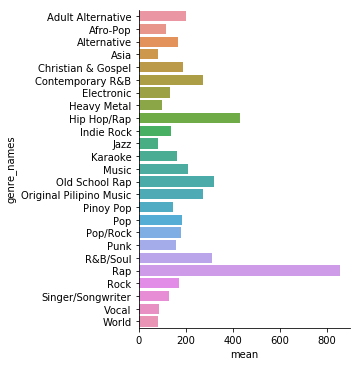

In [53]:
avg_genre_plot = sns.catplot(y="genre_names", x="mean", orient="h", kind="bar", data=avg_genre)

### Average Length of Song Lyrics x Artists

In [ ]:
# code here